# Crack the Code - Session 4 

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

chipo = pd.read_csv(url, sep = '\t')
chipo.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### Question 1 - What is the number of observations in the dataset? What is the number of columns and print their names? 

In [5]:
print(chipo.shape) # Number of observations and number of columns 
print(chipo.columns)

(4622, 5)
Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')


### Question 2 - Which was the most-ordered item and how many were ordered? 

In [15]:
chipo.groupby('item_name').sum().sort_values('quantity', ascending=False).head(1)

,order_id,quantity
item_name,,
Chicken Bowl,713926,761


### Question 3 - Check the item price type. Create a lambda function and change the type of item price

In [16]:
print(chipo.item_price.dtype)
converter = lambda x: float(x[1:-1])
chipo.item_price = chipo.item_price.apply(converter)
print(chipo.item_price.dtype)

object
float64


### Question 4 - Create a histogram of the top 5 items bought

In [23]:
top5 = chipo.groupby('item_name').sum().sort_values('quantity', ascending=False).head(5).reset_index()
top5

,item_name,order_id,quantity,item_price
0,Chicken Bowl,713926,761,7342.73
1,Chicken Burrito,497303,591,5575.82
2,Chips and Guacamole,449959,506,2201.04
3,Steak Burrito,328437,386,3851.43
4,Canned Soft Drink,304753,351,438.75


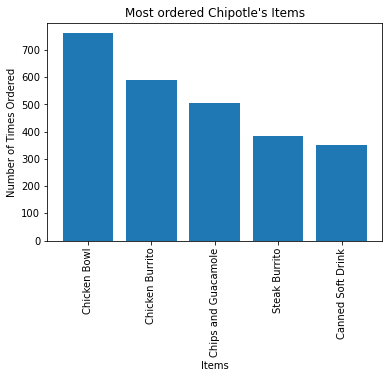

In [33]:
# create the plot
plt.bar(top5.item_name.iloc[0:5], top5.quantity.iloc[0:5])

# Set the title and labels
plt.xlabel('Items')
plt.xticks(rotation=90)
plt.ylabel('Number of Times Ordered')
plt.title('Most ordered Chipotle\'s Items')

# show the plot
plt.show()

### Question 5 - Create a scatterplot with the number of items orderered per order price

In [34]:
orders = chipo.groupby('order_id').sum()
orders

,quantity,item_price
order_id,,
1,4,11.56
2,2,16.98
3,2,12.67
4,2,21.00
5,2,13.70
...,...,...
1830,2,23.00
1831,3,12.90
1832,2,13.20


Text(0.5, 1.0, 'Number of items ordered per order price')

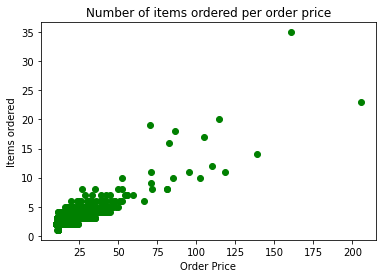

In [40]:
plt.scatter(x = orders.item_price, y = orders.quantity, c = 'green')
# Set the title and labels
plt.xlabel('Order Price')
plt.ylabel('Items ordered')
plt.title('Number of items ordered per order price')



### Question 6 - How many times was a Veggie Salad Bowl ordered?

In [41]:
salad = chipo[chipo.item_name == "Veggie Salad Bowl"]
len(salad)

18

### Question 7 - How many times did someone order more than one Canned Soda?

In [42]:
chipo_drink_steak_bowl = chipo[(chipo.item_name == "Canned Soda") & (chipo.quantity > 1)]
len(chipo_drink_steak_bowl)

20

### Question 8 - Create a list (or set) of all unique sodas and soft drinks that they sell

In [56]:
sodas = []
for i in range(len(chipo)):
    if chipo.item_name[i] == 'Canned Soda' or chipo.item_name[i] == 'Canned Soft Drink':
        unique_sodas.append(chipo.choice_description[i])
set(unique_sodas)

{'[Coca Cola]',
 '[Coke]',
 '[Diet Coke]',
 '[Diet Dr. Pepper]',
 '[Dr. Pepper]',
 '[Lemonade]',
 '[Mountain Dew]',
 '[Nestea]',
 '[Sprite]'}

### Question 9 - Calculate the average number of toppings per burrito

In [57]:
chipo[(chipo.item_name == "Burrito")]

,order_id,quantity,item_name,choice_description,item_price
510,214,1,Burrito,"[Adobo-Marinated and Grilled Chicken, Pinto Be...",7.4
511,214,1,Burrito,"[Braised Barbacoa, Vegetarian Black Beans, [So...",7.4
519,217,1,Burrito,"[Braised Barbacoa, Pinto Beans, [Sour Cream, S...",7.4
675,279,1,Burrito,"[Adobo-Marinated and Grilled Chicken, [Sour Cr...",7.4
759,313,1,Burrito,"[White Rice, Adobo-Marinated and Grilled Steak...",7.4
760,313,1,Burrito,"[White Rice, Adobo-Marinated and Grilled Steak...",7.4


In [62]:
toppings = []
for i in range(len(chipo)):
    if chipo.item_name[i] == 'Burrito':
        toppings.append(chipo.choice_description[i].count(',') + 1)
toppings

[7, 6, 7, 4, 4, 7]

In [66]:
np.mean(toppings)

5.833333333333333